### Урок 1. Вводный#

### -- Автор: Шенк Евгений Станиславович

### Задание 1.

В проектируемой локальной сети есть заданное количество компьютеров.  
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров.  
Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.  
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.  
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.  
1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [1]:
import numpy as np    
import math
import matplotlib.pyplot as plt

In [2]:
opt_link_price = 12  # стоимостью оптоволокна, р/м
twisted_pair_price = 30  # стоимостью витой пары, р/м
router_price = 5000 # стоимостью маршрутизатора

In [3]:
length_to_server = np.arange(1, 1000, 0.5) # расстояние до точки подключения роутера (либо опорного комп-ра, у которого мин расстояния до других, если без роутеров)
x0 = [0, 5, 10, 160] # Расстояния между комп-ми
x1 = [5, 0,  5, 155]
x2 = [10, 5, 0, 150]
x3 = [150, 155, 150, 0]
x_list = [x0, x1, x2, x3]

In [4]:
# Находим ближайший ко всем остальным комп-р
min_index = 0
min_length = float('inf')
for x in x_list:
    length = sum(x[1:])
    if length < min_length:
        min_length = length
        min_index = x_list.index(x)

In [5]:
# Стоимость без роутеров
# берем length_to_server * кол-во комп-ов + расстояния между ними
price_without_router = length_to_server * twisted_pair_price * len(x_list) + (sum([x * twisted_pair_price for x in x_list[min_index]]))

In [6]:
# Стоимость с роутерами
price_with_router = (router_price * math.ceil(len(x_list)/8)) + (length_to_server * opt_link_price * math.ceil(len(x_list)/8)) + (sum([x * twisted_pair_price for x in x_list[min_index]]))

In [7]:
TF = np.minimum(price_without_router, price_with_router)  

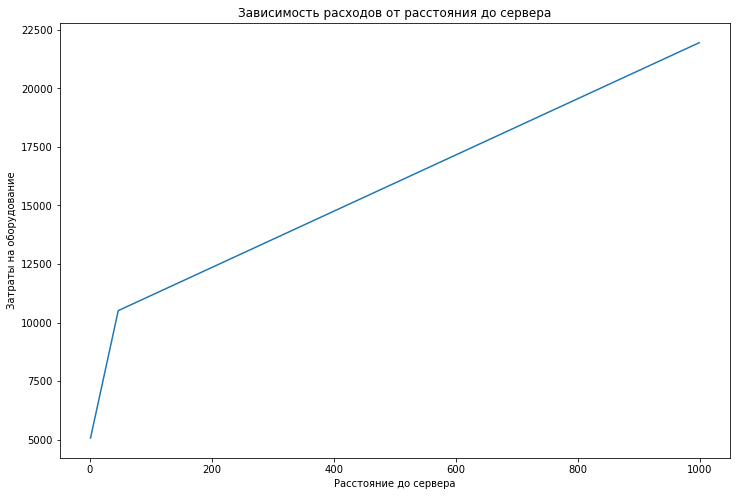

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
ax.plot(length_to_server, TF)
plt.title('Зависимость расходов от расстояния до сервера')
plt.ylabel('Затраты на оборудование')
plt.xlabel('Расстояние до сервера')
plt.show() 

### На графике видна зависимость стоимости от расстояния до сервера и момент в который целесообразно устанавливать роутер